In [1]:
import numpy as np
import pandas as pd
from csv_utf8ed_processing import processing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_pop = pd.read_csv('../data/2015_pop_and_area.csv')
df_pop2 = df_pop[['geo_id', 'county_name', 'area_sqmi', 'log_aland_sqmi', 'pop_est_2015', 'log_pop_est_2015', 'pop_den_2015', 'log_pop_den_2015']]
df_pop2.head()

,geo_id,county_name,area_sqmi,log_aland_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015
0,1001,"Autauga County, AL",594.439,6.387618,55347,10.921378,93.107956,4.533760
1,1003,"Baldwin County, AL",1589.808,7.371369,203709,12.224448,128.134341,4.853079
2,1005,"Barbour County, AL",884.877,6.785449,26489,10.184485,29.935234,3.399036
3,1007,"Bibb County, AL",622.583,6.433877,22583,10.024953,36.273075,3.591076
4,1009,"Blount County, AL",644.807,6.468951,57673,10.962544,89.442267,4.493593


In [3]:
type(df_pop2['geo_id'][0])

numpy.int64

In [4]:
df_pop2['geo_id'] = df_pop2['geo_id'].astype(str)
type(df_pop2['geo_id'][0])

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


str

In [5]:
dfb1 = processing('../data/BP_2015_00A1_with_ann_bar_utf8.csv', 'ESTAB', 'bar_big')
dfb1.head()

,geo_id,bar_big
1,1003,12
2,1015,4
3,1031,2
4,1033,3
5,1045,3


In [6]:
type(dfb1['bar_big'][1])

numpy.int64

In [7]:
result = pd.merge(df_pop2, dfb1, on='geo_id', how='outer')
result.head()

,geo_id,county_name,area_sqmi,log_aland_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,bar_big
0,1001,"Autauga County, AL",594.439,6.387618,55347,10.921378,93.107956,4.533760,NaN
1,1003,"Baldwin County, AL",1589.808,7.371369,203709,12.224448,128.134341,4.853079,12.0
2,1005,"Barbour County, AL",884.877,6.785449,26489,10.184485,29.935234,3.399036,NaN
3,1007,"Bibb County, AL",622.583,6.433877,22583,10.024953,36.273075,3.591076,NaN
4,1009,"Blount County, AL",644.807,6.468951,57673,10.962544,89.442267,4.493593,NaN


In [8]:
dfb2 = processing('../data/NES_2015_00A2_with_ann_bar_utf8.csv', 'NESTAB', 'bar_small', all_numeric=False)
dfb2.head()

,geo_id,bar_small
1,1001,D
2,1003,24
3,1005,D
4,1007,D
5,1009,D


In [9]:
result2 = pd.merge(result, dfb2, on='geo_id', how='left')
result2.head()

,geo_id,county_name,area_sqmi,log_aland_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,bar_big,bar_small
0,1001,"Autauga County, AL",594.439,6.387618,55347,10.921378,93.107956,4.533760,NaN,D
1,1003,"Baldwin County, AL",1589.808,7.371369,203709,12.224448,128.134341,4.853079,12.0,24
2,1005,"Barbour County, AL",884.877,6.785449,26489,10.184485,29.935234,3.399036,NaN,D
3,1007,"Bibb County, AL",622.583,6.433877,22583,10.024953,36.273075,3.591076,NaN,D
4,1009,"Blount County, AL",644.807,6.468951,57673,10.962544,89.442267,4.493593,NaN,D


In [10]:
print((result2['bar_small'] == 'D').sum(), (result2['bar_small'] == 'S').sum())

1034 14


In [11]:
# resultD = (result2['bar_small'] == 'D')
resultD = result2.iloc[np.where(result2["bar_small"] == 'D')]
resultS = result2.iloc[np.where(result2["bar_small"] == 'S')]
resultNDS = result2.iloc[np.where(result2["bar_small"] != 'D') and np.where(result2["bar_small"] != 'S')]

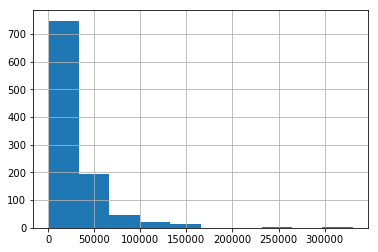

In [12]:
resultD['pop_est_2015'].hist()
plt.show()

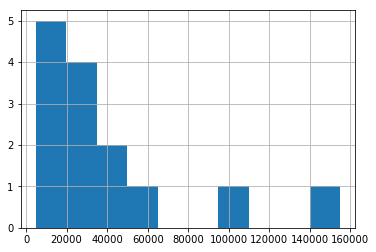

In [13]:
resultS['pop_est_2015'].hist()
plt.show()

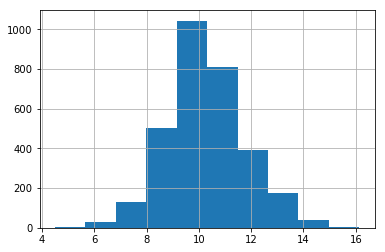

In [14]:
resultNDS['log_pop_est_2015'].hist()
plt.show()

In [15]:
dfh1 = processing('../data/BP_2015_00A1_with_ann_hot_utf8.csv', 'ESTAB', 'hot_big')
dfh1.head()

,geo_id,hot_big
1,1001,8
2,1003,51
3,1005,9
4,1009,2
5,1013,7


In [16]:
dfh2 = processing('../data/NES_2015_00A2_with_ann_hot_utf8.csv', 'NESTAB', 'hot_small', all_numeric=False)
dfh2.head()

,geo_id,hot_small
1,1001,D
2,1003,34
3,1005,3
4,1007,D
5,1009,3


In [17]:
print((dfh2['hot_small'] == 'D').sum(), (dfh2['hot_small'] == 'S').sum())

977 3


In [18]:
(dfh2['hot_small']=='1').sum()

0

In [19]:
result3 = pd.merge(result2, dfh1, on='geo_id', how='left')
result4 = pd.merge(result3, dfh2, on='geo_id', how='left')
result4.head()

,geo_id,county_name,area_sqmi,log_aland_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,bar_big,bar_small,hot_big,hot_small
0,1001,"Autauga County, AL",594.439,6.387618,55347,10.921378,93.107956,4.533760,NaN,D,8.0,D
1,1003,"Baldwin County, AL",1589.808,7.371369,203709,12.224448,128.134341,4.853079,12.0,24,51.0,34
2,1005,"Barbour County, AL",884.877,6.785449,26489,10.184485,29.935234,3.399036,NaN,D,9.0,3
3,1007,"Bibb County, AL",622.583,6.433877,22583,10.024953,36.273075,3.591076,NaN,D,NaN,D
4,1009,"Blount County, AL",644.807,6.468951,57673,10.962544,89.442267,4.493593,NaN,D,2.0,3


In [20]:
result_any_S = result4.loc[(result4['bar_small'] == 'S') | (result4['hot_small'] == 'S')]
result_any_S

,geo_id,county_name,area_sqmi,log_aland_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,bar_big,bar_small,hot_big,hot_small
85,2185,"North Slope Borough, AK",88839.308,11.394584,9687,9.178540,0.109040,-2.216044,NaN,NaN,4.0,S
205,6039,"Madera County, CA",2137.098,7.667204,154998,11.951167,72.527324,4.283963,8.0,S,24.0,16
421,13071,"Colquitt County, GA",546.986,6.304423,45844,10.733000,83.812017,4.428576,NaN,3,7.0,S
443,13115,"Floyd County, GA",509.923,6.234260,96504,11.477340,189.252103,5.243080,NaN,S,24.0,8
524,13279,"Toombs County, GA",364.006,5.897170,27241,10.212478,74.836679,4.315308,3.0,S,12.0,D
580,16059,"Lemhi County, ID",4563.293,8.425800,7735,8.953511,1.695048,0.527711,5.0,S,5.0,4
1155,22085,"Sabine Parish, LA",866.656,6.764642,24186,10.093529,27.907267,3.328887,NaN,S,5.0,4
1248,26035,"Clare County, MI",564.335,6.335648,30553,10.327218,54.139828,3.991570,7.0,S,3.0,9
1407,28013,"Calhoun County, MS",586.573,6.374297,14717,9.596759,25.089801,3.222461,NaN,D,NaN,S
1416,28031,"Covington County, MS",413.796,6.025373,19543,9.880372,47.228586,3.854999,NaN,S,2.0,NaN


In [21]:
len(result_any_S)

17

In [22]:
result_no_noval = result4.loc[(result4['bar_small'] != 'S') & (result4['hot_small'] != 'S') 
                              & (result4['bar_small'] != 'D') & (result4['hot_small'] != 'D')]
print(len(result4), len(result_no_noval))

3142 1527


In [23]:
result_no_hot_noval = result4.loc[(result4['hot_small'] != 'S') 
                              & (result4['hot_small'] != 'D')]
result_no_hot_noval['hot_small'] = result_no_hot_noval['hot_small'].astype(float)
min_hot_noval = result_no_hot_noval['hot_small'].min()
min_hot_noval

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3.0

In [24]:
result_no_bar_noval = result4.loc[(result4['bar_small'] != 'S') 
                              & (result4['bar_small'] != 'D')]
result_no_bar_noval['bar_small'] = result_no_bar_noval['bar_small'].astype(float)
min_bar_noval = result_no_bar_noval['bar_small'].min()
min_bar_noval

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3.0

In [27]:
# result_no_hot_noval_big = result4.loc[(result4['hot_big'] != 'S') & (result4['hot_big'] != 'D')]
result4['hot_big'] = result4['hot_big'].astype(float)
min_hot_noval_big = result4['hot_big'].min()


# result_no_bar_noval_big = result4.loc[(result4['bar_big'] != 'S') & (result4['bar_big'] != 'D')]
result4['bar_big'] = result4['bar_big'].astype(float)
min_bar_noval_big = result4['bar_big'].min()
print(min_hot_noval_big, min_bar_noval_big)

result4['bar_big'].fillna(min_bar_noval_big, inplace=True)
result4['hot_big'].fillna(min_hot_noval_big, inplace=True)

1.0 1.0


In [28]:
result4['bar_small'].fillna(3, inplace=True)
result4['hot_small'].fillna(3, inplace=True)

In [38]:
result4.replace('D', 1.5, inplace=True)
result4.replace('S', 1.5, inplace=True)

In [39]:
result4['hotels'] = result4['hot_big'].astype(float) + result4['hot_small'].astype(float)
result4['bars'] = result4['bar_big'].astype(float) + result4['bar_small'].astype(float)

In [40]:
result4

,geo_id,county_name,area_sqmi,log_aland_sqmi,pop_est_2015,log_pop_est_2015,pop_den_2015,log_pop_den_2015,bar_big,bar_small,hot_big,hot_small,hotels,bars
0,1001,"Autauga County, AL",594.439,6.387618,55347,10.921378,93.107956,4.533760,1.0,1.5,8.0,1.5,9.5,2.5
1,1003,"Baldwin County, AL",1589.808,7.371369,203709,12.224448,128.134341,4.853079,12.0,24,51.0,34,85.0,36.0
2,1005,"Barbour County, AL",884.877,6.785449,26489,10.184485,29.935234,3.399036,1.0,1.5,9.0,3,12.0,2.5
3,1007,"Bibb County, AL",622.583,6.433877,22583,10.024953,36.273075,3.591076,1.0,1.5,1.0,1.5,2.5,2.5
4,1009,"Blount County, AL",644.807,6.468951,57673,10.962544,89.442267,4.493593,1.0,1.5,2.0,3,5.0,2.5
5,1011,"Bullock County, AL",622.806,6.434235,10696,9.277625,17.173887,2.843390,1.0,3,1.0,1.5,2.5,4.0
6,1013,"Butler County, AL",776.828,6.655219,20154,9.911158,25.943967,3.255939,1.0,3,7.0,3,10.0,4.0
7,1015,"Calhoun County, AL",605.889,6.406697,115620,11.658064,190.827033,5.251367,4.0,6,27.0,8,35.0,10.0
8,1017,"Chambers County, AL",596.531,6.391131,34123,10.437727,57.202392,4.046596,1.0,5,3.0,1.5,4.5,6.0
9,1019,"Cherokee County, AL",553.720,6.316659,25859,10.160414,46.700498,3.843755,1.0,3,3.0,4,7.0,4.0


In [42]:
result4.to_csv('../data/2015_master_sd_1_5_nan_to_min.csv')

In [47]:
result4_toy = result4[['geo_id', 'county_name', 'area_sqmi', 'pop_est_2015', 'hotels', 'bars']]
result4_toy.to_csv('../data/2015_toy_sd_1_5_nan_to_min.csv')

In [49]:
result4_toy[result4_toy['county_name']=='Boulder County, CO']

,geo_id,county_name,area_sqmi,pop_est_2015,hotels,bars
250,8013,"Boulder County, CO",726.34,319372,113.0,29.0
